# 本文实验建立的网络拓扑结构 

# 1. Abilene 拓扑（NSFNet） 11个节点 14条双向链路

Abilene Nodes [0, 3, 4, 10, 1, 7, 2, 5, 8, 9, 6] 
 Abilene Edges:[(0, 3), (0, 4), (0, 10), (3, 5), (3, 6), (4, 1), (4, 5), (10, 7), (1, 7), (2, 5), (2, 8), (2, 9), (8, 6), (8, 9)]


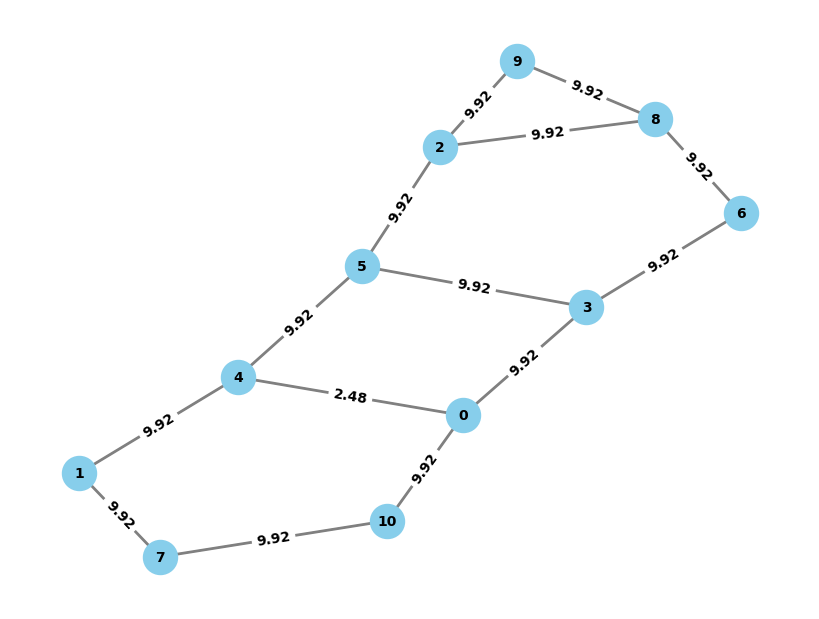

In [1]:
# Abilene(NSFNet) 美国主要城市骨干网络，设置大部分链路带宽值为10Mbps、一条瓶颈链路带宽为2.5Mbps
# Abilene Network 是美国 Internet2 计划的一部分
# NSFNet 是 1980 年代由美国国家科学基金会（NSF）资助建设的学术网络
# 这里网络每个节点的编号与gml文件不同，但不影响

import networkx as nx
import matplotlib.pyplot as plt

Abi_graph = nx.Graph()

# NSFNET 有14个节点 21条边
def create_nsfnet_graph():
    Gbase = nx.Graph()
    Gbase.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
    Gbase.add_edges_from(
        [(0, 1), (0, 2), (0, 3), (1, 2), (1, 7), (2, 5), (3, 8), (3, 4), (4, 5), (4, 6), (5, 12), (5, 13),
         (6, 7), (7, 10), (8, 9), (8, 11), (9, 10), (9, 12), (10, 11), (10, 13), (11, 12)])
    return Gbase

def load_topoinfo(toponame):
    topo_file = open("./testbed/topo_info/%s.txt" % toponame, "r")
    content = topo_file.readlines()
    nodeNum, linkNum = map(int, content[0].split())
    linkSet = []
    bandwidths = []
    losses = []
    for i in range(linkNum):
        u, v, w, c, loss = map(int, content[i + 1].split())
        linkSet.append([u - 1, v - 1])
        bandwidths.append(float(c) / 1000) 
        losses.append(loss)
        Abi_graph.add_edge(u-1, v-1, capacity=float(c) / 1000, loss=loss)
    return nodeNum, linkSet, bandwidths, losses

nodeNum, linkSet, bandwidths, losses = load_topoinfo("Abi")
print(f"Abilene Nodes {Abi_graph.nodes()} \n Abilene Edges:{Abi_graph.edges()}")

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(Abi_graph)
nx.draw(Abi_graph, pos=pos, with_labels=True, node_size=600, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
nx.draw_networkx_edges(Abi_graph, pos, width=2, edge_color='gray')

# 显示边的属性（例如权重）
edge_labels = nx.get_edge_attributes(Abi_graph, 'capacity')
nx.draw_networkx_edge_labels(Abi_graph, pos, edge_labels=edge_labels, font_size=10, font_weight='bold')
plt.savefig('Abilene.png') 
plt.show()

# 流量矩阵可视化

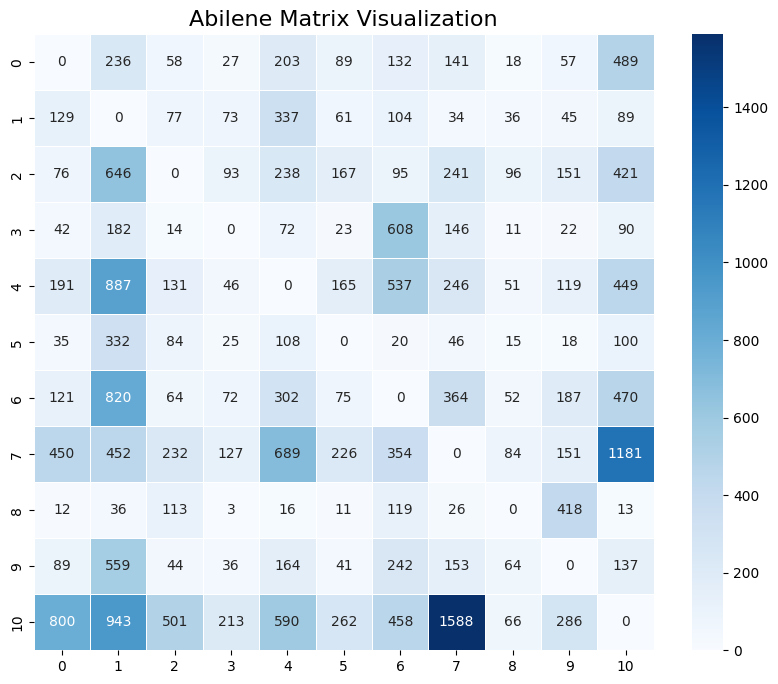

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 给定的流量矩阵数据（按行排列）
data = [
    [0, 236, 58, 27, 203, 89, 132, 141, 18, 57, 489],
    [129, 0, 77, 73, 337, 61, 104, 34, 36, 45, 89],
    [76, 646, 0, 93, 238, 167, 95, 241, 96, 151, 421],
    [42, 182, 14, 0, 72, 23, 608, 146, 11, 22, 90],
    [191, 887, 131, 46, 0, 165, 537, 246, 51, 119, 449],
    [35, 332, 84, 25, 108, 0, 20, 46, 15, 18, 100],
    [121, 820, 64, 72, 302, 75, 0, 364, 52, 187, 470],
    [450, 452, 232, 127, 689, 226, 354, 0, 84, 151, 1181],
    [12, 36, 113, 3, 16, 11, 119, 26, 0, 418, 13],
    [89, 559, 44, 36, 164, 41, 242, 153, 64, 0, 137],
    [800, 943, 501, 213, 590, 262, 458, 1588, 66, 286, 0]
]

# 转换为 NumPy 数组
matrix = np.array(data)

# 创建热图
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=True, linewidths=0.5)

# 添加标题
plt.title('Abilene Matrix Visualization', fontsize=16)

# 显示图形
plt.show()


# 2.GEANT 拓扑 23个节点 37条双向链路

GEA Nodes [9, 2, 21, 19, 14, 13, 6, 18, 10, 4, 7, 16, 12, 5, 8, 20, 15, 1, 0, 11, 3, 22, 17] GEA Edges:[(9, 2), (9, 10), (9, 15), (9, 11), (9, 16), (2, 13), (2, 10), (2, 20), (2, 0), (21, 19), (21, 11), (19, 14), (19, 16), (14, 8), (13, 12), (6, 18), (6, 16), (6, 5), (6, 1), (6, 0), (6, 20), (18, 12), (18, 5), (4, 7), (4, 15), (7, 8), (16, 12), (16, 22), (12, 1), (8, 15), (20, 17), (15, 0), (15, 3), (1, 3), (1, 17), (1, 22), (1, 11)]


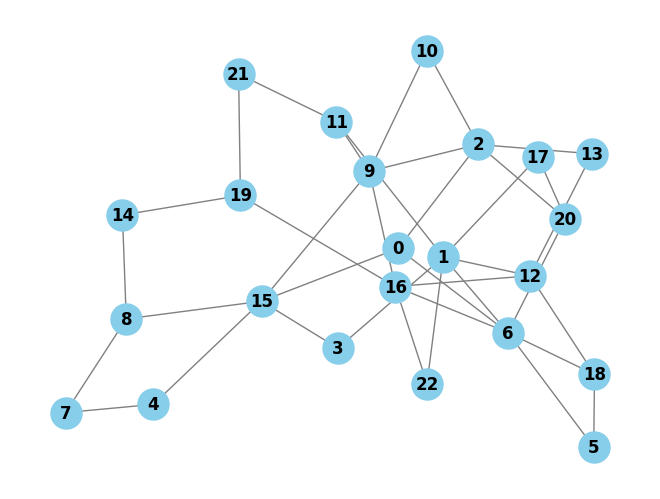

In [2]:
# 欧洲学术网络（European Network）
nodeNum, linkSet, bandwidths, losses = load_topoinfo("GEA")
GEA_graph = nx.Graph()
GEA_graph.add_edges_from(linkSet)
print(f"GEA Nodes {GEA_graph.nodes()} GEA Edges:{GEA_graph.edges()}")
nx.draw(GEA_graph, pos=nx.spring_layout(GEA_graph), with_labels=True, node_size=500, node_color="skyblue", font_size=12, font_weight="bold", edge_color="gray")
plt.savefig("GEANT.png")
plt.show()


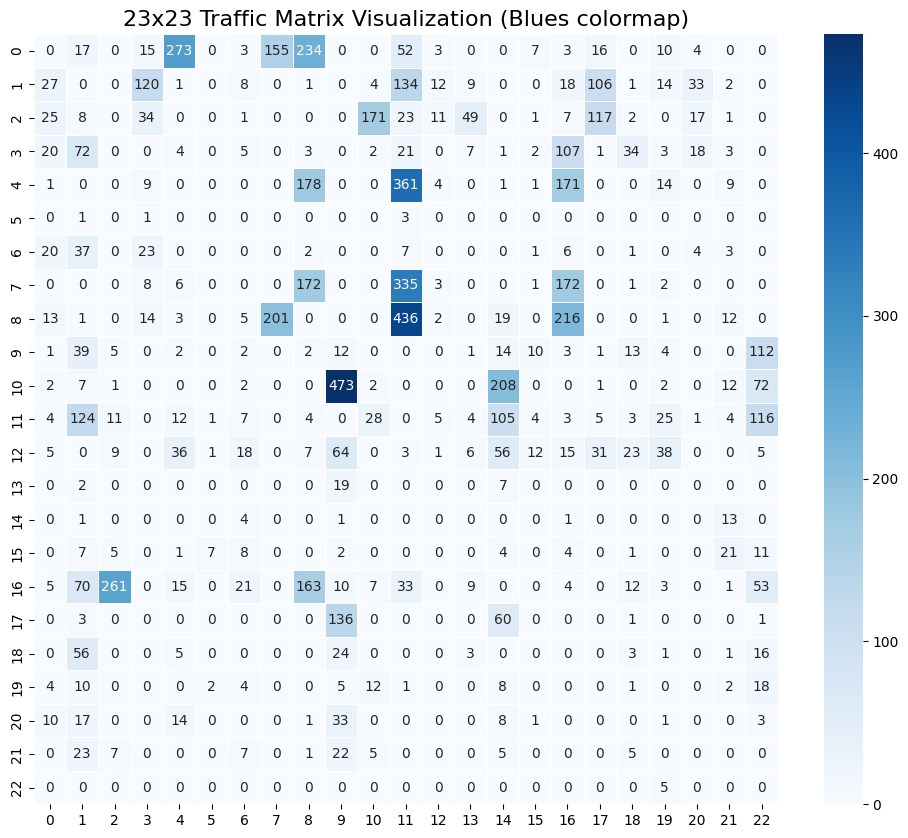

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 给定的23x23流量矩阵数据
# 这个流量矩阵大部分数据都是0，也就是源和目的产生的概率比较低
# 可以利用代概率密度矩阵
data = [
    [0, 17, 0, 15, 273, 0, 3, 155, 234, 0, 0, 52, 3, 0, 0, 7, 3, 16, 0, 10, 4, 0, 0],
    [27, 0, 0, 120, 1, 0, 8, 0, 1, 0, 4, 134, 12, 9, 0, 0, 18, 106, 1, 14, 33, 2, 0],
    [25, 8, 0, 34, 0, 0, 1, 0, 0, 0, 171, 23, 11, 49, 0, 1, 7, 117, 2, 0, 17, 1, 0],
    [20, 72, 0, 0, 4, 0, 5, 0, 3, 0, 2, 21, 0, 7, 1, 2, 107, 1, 34, 3, 18, 3, 0],
    [1, 0, 0, 9, 0, 0, 0, 0, 178, 0, 0, 361, 4, 0, 1, 1, 171, 0, 0, 14, 0, 9, 0],
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [20, 37, 0, 23, 0, 0, 0, 0, 2, 0, 0, 7, 0, 0, 0, 1, 6, 0, 1, 0, 4, 3, 0],
    [0, 0, 0, 8, 6, 0, 0, 0, 172, 0, 0, 335, 3, 0, 0, 1, 172, 0, 1, 2, 0, 0, 0],
    [13, 1, 0, 14, 3, 0, 5, 201, 0, 0, 0, 436, 2, 0, 19, 0, 216, 0, 0, 1, 0, 12, 0],
    [1, 39, 5, 0, 2, 0, 2, 0, 2, 12, 0, 0, 0, 1, 14, 10, 3, 1, 13, 4, 0, 0, 112],
    [2, 7, 1, 0, 0, 0, 2, 0, 0, 473, 2, 0, 0, 0, 208, 0, 0, 1, 0, 2, 0, 12, 72],
    [4, 124, 11, 0, 12, 1, 7, 0, 4, 0, 28, 0, 5, 4, 105, 4, 3, 5, 3, 25, 1, 4, 116],
    [5, 0, 9, 0, 36, 1, 18, 0, 7, 64, 0, 3, 1, 6, 56, 12, 15, 31, 23, 38, 0, 0, 5],
    [0, 2, 0, 0, 0, 0, 0, 0, 0, 19, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 13, 0],
    [0, 7, 5, 0, 1, 7, 8, 0, 0, 2, 0, 0, 0, 0, 4, 0, 4, 0, 1, 0, 0, 21, 11],
    [5, 70, 261, 0, 15, 0, 21, 0, 163, 10, 7, 33, 0, 9, 0, 0, 4, 0, 12, 3, 0, 1, 53],
    [0, 3, 0, 0, 0, 0, 0, 0, 0, 136, 0, 0, 0, 0, 60, 0, 0, 0, 1, 0, 0, 0, 1],
    [0, 56, 0, 0, 5, 0, 0, 0, 0, 24, 0, 0, 0, 3, 0, 0, 0, 0, 3, 1, 0, 1, 16],
    [4, 10, 0, 0, 0, 2, 4, 0, 0, 5, 12, 1, 0, 0, 8, 0, 0, 0, 1, 0, 0, 2, 18],
    [10, 17, 0, 0, 14, 0, 0, 0, 1, 33, 0, 0, 0, 0, 8, 1, 0, 0, 0, 1, 0, 0, 3],
    [0, 23, 7, 0, 0, 0, 7, 0, 1, 22, 5, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0]
]

# 转换为 NumPy 数组
matrix = np.array(data)

# 创建热图
plt.figure(figsize=(12, 10))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=True, linewidths=0.5)

# 添加标题
plt.title('23x23 Traffic Matrix Visualization (Blues colormap)', fontsize=16)

# 显示图形
plt.show()


# 3. GBN 拓扑 16个节点 26条双向链路

GBN Node:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], Edges:[(0, 2), (0, 8), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 9), (4, 8), (4, 10), (4, 9), (5, 6), (5, 8), (6, 7), (7, 8), (7, 10), (9, 10), (9, 12), (10, 11), (10, 12), (11, 13), (12, 14), (12, 16), (13, 14), (14, 15), (15, 16)] Edge Num:26


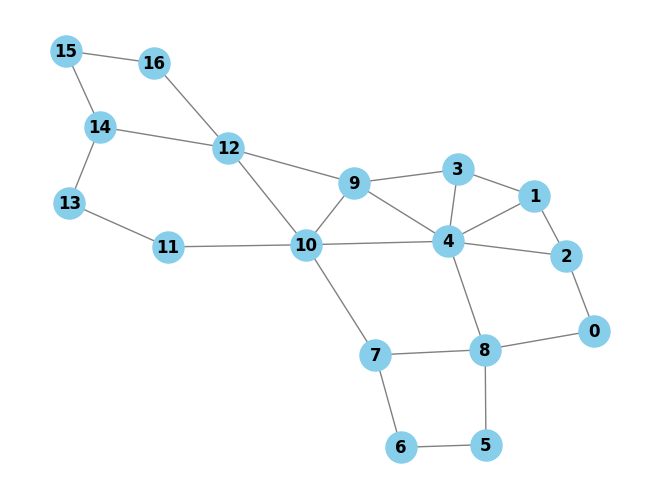

In [5]:
# 针对GBN的网络可以构造等概率的流量发送，也可以基于TMGen流量矩阵，基于流量矩阵选择源和目的
# 关于GBN拓扑的链路带宽设置，

def create_gbn_graph():
    Gbase = nx.Graph()
    Gbase.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
    Gbase.add_edges_from(
        [(0, 2), (0, 8), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 9), (4, 8), (4, 10), (4, 9),
         (5, 6), (5, 8), (6, 7), (7, 8), (7, 10), (9, 10), (9, 12), (10, 11), (10, 12), (11, 13),
         (12, 14), (12, 16), (13, 14), (14, 15), (15, 16)])
    return Gbase

GBN_graph = create_gbn_graph()
print(f"GBN Node:{GBN_graph.nodes}, Edges:{GBN_graph.edges()} Edge Num:{len(GBN_graph.edges)}")
nx.draw(GBN_graph, pos=nx.spring_layout(GBN_graph), with_labels=True, node_size=500, node_color="skyblue", font_size=12, font_weight="bold", edge_color="gray")
plt.savefig("GBN.")

# 延迟指标对比数据

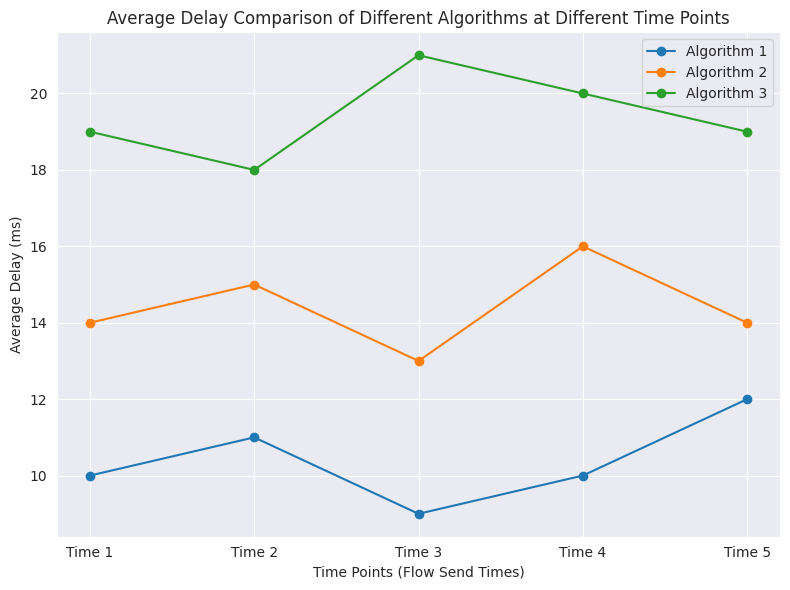

In [30]:
import matplotlib.pyplot as plt

# 假设每个算法在不同时间点下的平均延迟数据（单位：毫秒）
# 每个列表的元素表示在不同发送时间下的平均延迟
algorithms = ['Algorithm 1', 'Algorithm 2', 'Algorithm 3']
delay_data = [
    [10, 11, 9, 10, 12],  # Algorithm 1 的延迟数据
    [14, 15, 13, 16, 14],  # Algorithm 2 的延迟数据
    [19, 18, 21, 20, 19],  # Algorithm 3 的延迟数据
]

# x轴，表示不同的时间点（例如：每个时间点对应单个流量发送时的延迟）
time_points = ['Time 1', 'Time 2', 'Time 3', 'Time 4', 'Time 5']

# 创建一个新的图形
plt.figure(figsize=(8, 6))

# 绘制每个算法的折线图
for i, algo in enumerate(algorithms):
    plt.plot(time_points, delay_data[i], label=algo, marker='o')

# 设置图表的标题和标签
plt.title('Average Delay Comparison of Different Algorithms at Different Time Points')
plt.xlabel('Time Points (Flow Send Times)')
plt.ylabel('Average Delay (ms)')

# 添加图例
plt.legend()

# 显示图表
plt.grid(True)
plt.tight_layout()
plt.show()